<a href="https://colab.research.google.com/github/Zahidd02/Machine_Learning/blob/master/TensorFlow/Cats_vs_Dogs_Image_Classification_using_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://learn.udacity.com/courses/ud187/lessons/4a041ac9-3bb9-43d6-8a02-4fa912626028/concepts/610653f2-f9a7-43fa-a8c8-d166eea9c4ce
from __future__ import absolute_import, division

import os
import matplotlib.pyplot as plt
import numpy as np
import math 

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', 
                                  origin=url, extract=True)

68606236/68606236 [==============================] - 0s 0us/step


In [4]:
# !ls /root/.keras/datasets/cats_and_dogs_filtered  
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'validation')

In [5]:
train_img_generator = ImageDataGenerator(rescale = 1/255)
test_img_generator = ImageDataGenerator(rescale=1/255)

In [6]:
BATCH_SIZE = 590
IMG_SHAPE = 224
train_data = train_img_generator.flow_from_directory(batch_size=BATCH_SIZE,
             directory=train_dir, shuffle=True, target_size=(IMG_SHAPE, IMG_SHAPE),
             class_mode='binary')
test_data = train_img_generator.flow_from_directory(batch_size=BATCH_SIZE,
             directory=test_dir, shuffle=True, target_size=(IMG_SHAPE, IMG_SHAPE),
             class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Cat
(590, 224, 224, 3)


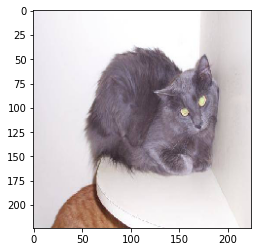

In [7]:
sample_img, sample_label = train_data[0]
label = ['Cat', 'Dog']
print(label[int(sample_label[0])]) # Cat => 0.0, Dog => 1.0
print(sample_img.shape)
plt.imshow(sample_img[0])

Using a pre-trained model called "MobileNet v2" from TensorFlow hub to predict the images.

In [8]:
MobileNet_url="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
model = tf.keras.Sequential([
    hub.KerasLayer(MobileNet_url, input_shape=(IMG_SHAPE, IMG_SHAPE, 3), trainable=False),
    tf.keras.layers.Dense(2)
])

In [9]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


Here we are getting around 97% validation/test accuracy (val_accuracy: 0.9710). 

In [11]:
model.fit(train_data, epochs=6, validation_data=test_data)

Epoch 1/6
4/4 [==============================] - 33s 5s/step - loss: 0.6923 - accuracy: 0.6210 - val_loss: 0.4849 - val_accuracy: 0.8000
Epoch 2/6
4/4 [==============================] - 12s 3s/step - loss: 0.3623 - accuracy: 0.8785 - val_loss: 0.2640 - val_accuracy: 0.9230
Epoch 3/6
4/4 [==============================] - 12s 3s/step - loss: 0.2157 - accuracy: 0.9410 - val_loss: 0.1723 - val_accuracy: 0.9480
Epoch 4/6
4/4 [==============================] - 12s 3s/step - loss: 0.1422 - accuracy: 0.9595 - val_loss: 0.1250 - val_accuracy: 0.9660
Epoch 5/6
4/4 [==============================] - 12s 3s/step - loss: 0.1092 - accuracy: 0.9655 - val_loss: 0.1016 - val_accuracy: 0.9700
Epoch 6/6
4/4 [==============================] - 13s 3s/step - loss: 0.0921 - accuracy: 0.9695 - val_loss: 0.0886 - val_accuracy: 0.9710


In [12]:
image_batch, label_batch = test_data[0]

In [13]:
predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()
predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = []
for id in predicted_ids:
  predicted_class_names.append(label[id])
predicted_class_names = np.array(predicted_class_names)

19/19 [==============================] - 2s 52ms/step


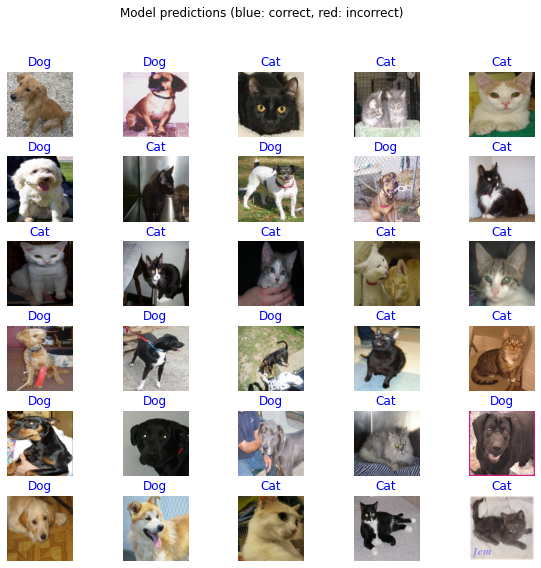

In [14]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
  plt.suptitle("Model predictions (blue: correct, red: incorrect)")

DO NOT FORGET to normalize the image array by diving it by '255.0' (since it was trained on normalized array) otherwise the predictions will be very wrong.

1/1 [==============================] - 0s 330ms/step
[[ 3.5034323 -2.7907882]]
1/1 [==============================] - 0s 44ms/step
Cat


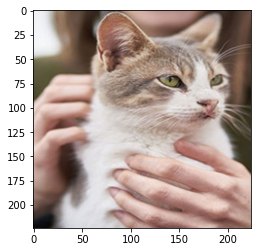

In [15]:
import urllib.request
from PIL import Image

urllib.request.urlretrieve('https://www.purina.in/sites/default/files/2019-10/Steps-to-Raise-a-Perfect-Cat_0.jpg', 'pet.jpeg')
pet_img = Image.open('pet.jpeg').resize((224,224))
img = np.array(pet_img)
img = img/255.0
img = img[np.newaxis, :]
print(model.predict(img))
print(label[np.argmax(model.predict(img))])
plt.imshow(pet_img)